### KMEANS 2 Clusters vs predictions group or/ JND

In [38]:
import os 
from sklearn.cluster import KMeans


import warnings

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from itertools import combinations
from math import log
import scipy.stats as scs
import mpl_toolkits.mplot3d

from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

import warnings

In [40]:
SubjectTable_imputed = pd.read_csv('Subject_imputed.csv', sep=",")
SavedFeaturesSelected=np.load('SavedFeaturesSelected.npy',allow_pickle=True)


list_of_selfeatures=np.load('SavedFeaturesSelectedBackward20to2_CC5_RD.npy',allow_pickle=True)

psychophy=0
fonctionalIHD=0

nclust=2
dti_metric='FA'
CC=5

SubjectTable_imputedNp=SubjectTable_imputed.to_numpy()
JND_Group_only=SubjectTable_imputedNp[:,1]
np.median((np.fix(list(JND_Group_only))))
JNDgroup=[]
for i in JND_Group_only:
     if i>np.median((np.fix(list(JND_Group_only)))):
         JNDgroup.append(0)
     else :
         JNDgroup.append(1)
         
SubjectTable_imputed["JND_group"]=JNDgroup

SubjectTable_imputed.head()

,age,JND_P,IHD,group_O,group_Y,group,JND_group
0,25.0,9.56,0.534027,0.0,1.0,Y,0
1,27.0,6.69,0.570600,0.0,1.0,Y,0
2,28.0,12.92,-0.140120,0.0,1.0,Y,0
3,21.0,1.95,0.488581,0.0,1.0,Y,1
4,25.0,2.54,0.578001,0.0,1.0,Y,1


NameError: name 'dataRaw' is not defined

In [ ]:

##%%% loop for CC x and/or Metric
AllSilScore,AllCalHar,Allinertia=[],[],[]

dataRaw = pd.read_csv('CC_'+str(CC) +'_'+dti_metric+'.csv', sep=",")
data=pd.concat([data, SubjectTable_imputed.iloc[:,1], SubjectTable_imputed.iloc[:,2]], axis=1)
CCX=dfCCx.to_numpy()

SelectedFeat=SavedFeaturesSelected[0,CC-1]
data=pd.concat([dataRaw.iloc[:,SelectedFeat], SubjectTable_imputed], axis=1)
Y_group=data["group"] 
Y_JND=data["JND_group"] 
dataready=data.drop(['age','group_Y', 'group_O', 'JND_group', 'group'], axis=1)
dataready.head()
dataready.columns



# CCx_SelectedFeat=SavedFeaturesSelected[0,CC-1]
CCx_SelectedFeat=list_of_selfeatures[5]

scaler = StandardScaler()
dfccxpsycho_scaled = scaler.fit_transform(dfccxpsycho)
dfccxpsycho_scaled_df = pd.DataFrame(dfccxpsycho_scaled, columns=dfccxpsycho.columns)
dfccxpsycho_scaled_df.head()

# ccxpsycho=dfccxpsycho_scaled_df.to_numpy()

CCx_SelectedFeatK=CCx_SelectedFeat
CCx_SelectedFeatK=list(CCx_SelectedFeatK)
 
if psychophy==1:
    CCx_SelectedFeatK.append(98)
if fonctionalIHD==1:
    CCx_SelectedFeatK.append(99)    

dfccxpsycho_scaled_SFonly=dfccxpsycho_scaled_df.iloc[:, CCx_SelectedFeatK]

X=dfccxpsycho_scaled[:,(CCx_SelectedFeatK)]

kmeans = KMeans(n_clusters=nclust, random_state=42).fit(X)

kmeans.labels_
CenterCluster=kmeans.cluster_centers_
labels_CCx = kmeans.labels_
 
SilScore=[]
CalHar=[]
DavBouldin=[]
inertia=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    SilScore.append(silhouette_score(X, kmeans.fit_predict(X)))
    CalHar.append(calinski_harabasz_score(X, kmeans.labels_))
    # DavBouldin.append(davies_bouldin_score(X, labels))
    inertia.append(kmeans.inertia_)  # Inertie (cohésion)

AllSilScore.append(SilScore)
AllCalHar.append(CalHar)
Allinertia.append(inertia)

labels_CCx
Group=SubjectTable_imputed["group"]

GroupLabel=[Group,labels_CCx]


dfccxpsycho_scaled_SFonly.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

# PLOT KMEANS RESULTS

featScatter=CCx_SelectedFeatK#[CCx_SelectedFeatK[1],CCx_SelectedFeatK[2],CCx_SelectedFeatK[3]]

#%%
# fig.suptitle('Segment ' + str(CC)  + ' / Psychophy.: ' + str(psychophy) + ' / HID.: ' + str(fonctionalIHD), fontsize=22) # or plt.suptitle('Main title')

plt.rcParams.update({'font.size': 10})

FontSizePlot=12
    
f1=str(featScatter[1])
f2=str(featScatter[2])
# axis[0][0].scatter(CCx[:, x], CCx[:, y], s=40,c=labels_CCx.astype(float)*5, marker='.')



fig, axes = plt.subplots(2, 5, figsize=(15, 5))#, sharey=True)
fig.suptitle('Segment ' + str(CC)  + ' / Psychophy.: ' + str(psychophy) + ' / HID.: ' + str(fonctionalIHD), fontsize=12 )# or plt.suptitle('Main title')    


sns.scatterplot(ax=axes[0][0],data=dfccxpsycho_scaled_df, x=f1, y=f2,hue=SubjectTable_imputed["group"]) 
sns.scatterplot(ax=axes[0][1],data=dfccxpsycho_scaled_df, x=f1, y=f2,hue=labels_CCx) 
sns.scatterplot(ax=axes[0][2],data=dfccxpsycho_scaled_df, x=SubjectTable_imputed["JND_P"], y=SubjectTable_imputed["IHD"],hue=SubjectTable_imputed["group"]) 
sns.scatterplot(ax=axes[0][3],data=dfccxpsycho_scaled_df, x=SubjectTable_imputed["JND_P"], y=SubjectTable_imputed["IHD"],hue=labels_CCx) 
# sns.scatterplot(ax=axes[0][2],data=dfccxpsycho_scaled_df, x=SubjectTable_imputed["JND_P"], y=f1,hue=SubjectTable_imputed["group"]) 
# sns.scatterplot(ax=axes[0][3],data=dfccxpsycho_scaled_df, x=SubjectTable_imputed["JND_P"],  y=f1,hue=labels_CCx) 

# sns.scatterplot(ax=axes[0][2],data=dfccxpsycho_scaled_df, x=SubjectTable_imputed["JND_P"], y=f2,hue=SubjectTable_imputed["group"]) 
# sns.scatterplot(ax=axes[0][3],data=dfccxpsycho_scaled_df, x=SubjectTable_imputed["JND_P"],  y=f2,hue=labels_CCx) 

axes[0][0].spines[['right', 'top']].set_visible(False)
axes[0][1].spines[['right', 'top']].set_visible(False)
axes[0][2].spines[['right', 'top']].set_visible(False)
axes[0][3].spines[['right', 'top']].set_visible(False)


K_range = range(2, 10)  

df = pd.DataFrame({'Silhouette Score': SilScore,'Inertia': inertia,
               'Cal.-Har. Index': CalHar,'N Cluster': K_range})


sns.lineplot(ax=axes[1][0],data=df, y='Silhouette Score', x='N Cluster', marker='o',markersize=8)

sns.lineplot(ax=axes[1][1],data=df, x='N Cluster', y='Cal.-Har. Index', marker='o',markersize=8)
sns.lineplot(ax=axes[1][2],data=df, x='N Cluster', y='Inertia', marker='o',markersize=8)
axes[1][0].spines[['right', 'top']].set_visible(False)
axes[1][1].spines[['right', 'top']].set_visible(False)
axes[1][2].spines[['right', 'top']].set_visible(False)

if psychophy==1:
    predicteur_list=['Old Vs Young']
else :
    predicteur_list=['Old Vs Young','JND']


for predicteurID in range(len(predicteur_list)):
    
    predicteur_str=predicteur_list[predicteurID]
    
    if predicteur_str=='JND':
            predicteur=JNDgroup
    elif predicteur_str=='Old Vs Young':
            predicteur=SubjectTable_imputed["group"]

    if predicteurID==0:
        a,b =0,4
    elif predicteurID==1:
        a,b =1,4

    df_clusters = pd.DataFrame({
    'actual': predicteur, 
    'predicted': labels_CCx    
    })
     
    df_clusters = df_clusters.sort_values(by='predicted')
    
    group_distribution = pd.crosstab(df_clusters['predicted'], df_clusters['actual'])
     
    group_distribution.plot(ax=axes[a][b],kind='bar', stacked=True)
    axes[a][b].set_xlabel("Clusters", fontsize=10)
    axes[a][b].set_ylabel("Nombre d'individus", fontsize=FontSizePlot)
    axes[a][b].set_title('Predictor_' + predicteur_str+ '_Segment ' + str(CC)  + '_' + dti_metric + '_Psychophy_'
                   + str(psychophy) + '_HID_' + str(fonctionalIHD), fontsize=12)
    axes[a][b].spines['top'].set_visible(False)
    axes[a][b].spines['right'].set_visible(False)

        
plt.tight_layout()
    

plt.savefig('Segment_' + str(CC) + '_' + dti_metric  + '_ Psychophy_' + str(psychophy) + '_ HID_' + 
            str(fonctionalIHD)+'.eps', format='eps', bbox_inches="tight")

plt.show()

IndexError: list index out of range

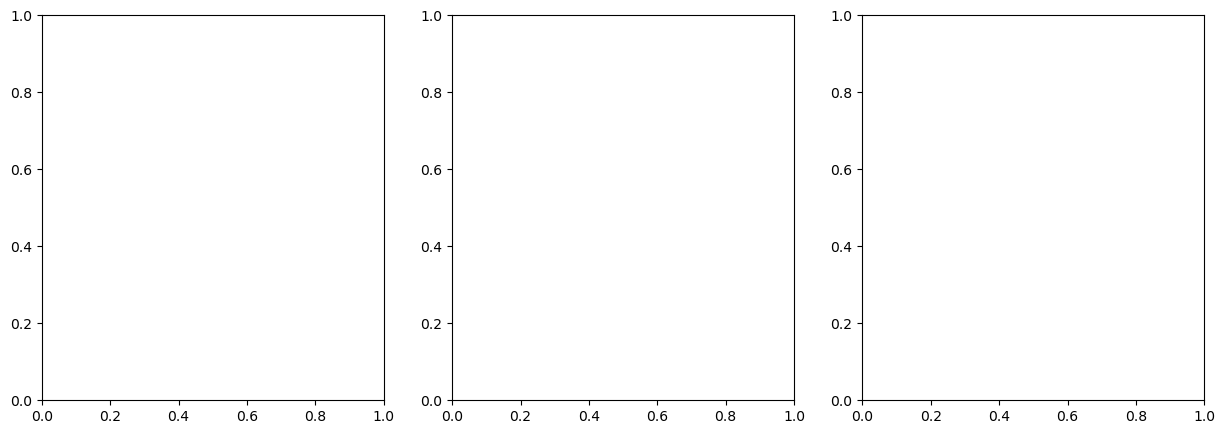

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))#, sharey=True)


K_range = range(2, 10)  
df = pd.DataFrame({'Silhouette Score': AllSilScore[i],'Inertia': Allinertia[i],
               'Cal.-Har. Index': AllCalHar[i],'N Cluster': K_range})
sns.lineplot(ax=axes[0],data=df, y='Silhouette Score', x='N Cluster', marker='o',markersize=8)
sns.lineplot(ax=axes[1],data=df, y='Cal.-Har. Index', x='N Cluster', marker='o',markersize=8)
sns.lineplot(ax=axes[2],data=df, y='Inertia', x='N Cluster', marker='o',markersize=8)

axes[0].spines[['right', 'top']].set_visible(False)
axes[1].spines[['right', 'top']].set_visible(False)
axes[2].spines[['right', 'top']].set_visible(False)




sns.lineplot(ax=axes[0], y=AllSilScore[i], x=K_range, marker='o',markersize=8)
sns.lineplot(ax=axes[1], y=AllCalHar[i], x=K_range, marker='o',markersize=8)
sns.lineplot(ax=axes[2], y=Allinertia[i], x=K_range, marker='o',markersize=8)







plt.show()    